In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings #used to supress user warnings
#-----------------------------------------------------------------------------------------------------------------------------
#supresses 'user warnings' related to boolean series
warnings.filterwarnings(action='ignore', category=UserWarning, message=r"Boolean Series.*")
#-----------------------------------------------------------------------------------------------------------------------------
#imported cleaned database
df = pd.read_csv(r"cleaned_student_depression_dataset.csv",index_col= 0,header = 0 )

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27857 entries, 0 to 27901
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27857 non-null  int64  
 1   Gender                                 27857 non-null  object 
 2   Age                                    27857 non-null  int64  
 3   City                                   27857 non-null  object 
 4   Profession                             27857 non-null  object 
 5   Academic Pressure                      27857 non-null  int64  
 6   Work Pressure                          27857 non-null  int64  
 7   CGPA                                   27857 non-null  float64
 8   Study Satisfaction                     27857 non-null  int64  
 9   Job Satisfaction                       27857 non-null  int64  
 10  Sleep Duration                         27857 non-null  object 
 11  Dietary

In [291]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
Serial Number,,,,,,,,,,,,,,,,,,
0,1,Male,19,Delhi,Student,4,0,6.00,3,0,'6-7 hours',Moderate,B.Com,Yes,8,4,No,True
1,2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,True
2,8,Female,24,Bangalore,Student,2,0,5.90,5,0,'5-6 hours',Moderate,BSc,No,3,2,Yes,False
3,26,Male,31,Srinagar,Student,3,0,7.03,5,0,'Less than 5 hours',Healthy,BA,No,9,1,Yes,False
4,30,Female,28,Varanasi,Student,3,0,5.59,2,0,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,True


In [292]:
df.describe() #description of cleaned database

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
count,27857.000000,27857.000000,27857.000000,27857.000000,27857.000000,27857.000000,27857.000000,27857.000000,27857.000000
mean,70443.316725,25.820835,3.141580,0.000431,7.655911,2.944395,0.000682,7.157196,3.140467
std,40648.631003,4.906158,1.381802,0.044027,1.470837,1.360876,0.044429,3.707066,1.437145
min,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.280000,2.000000,0.000000,4.000000,2.000000
50%,70694.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000
75%,105827.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000


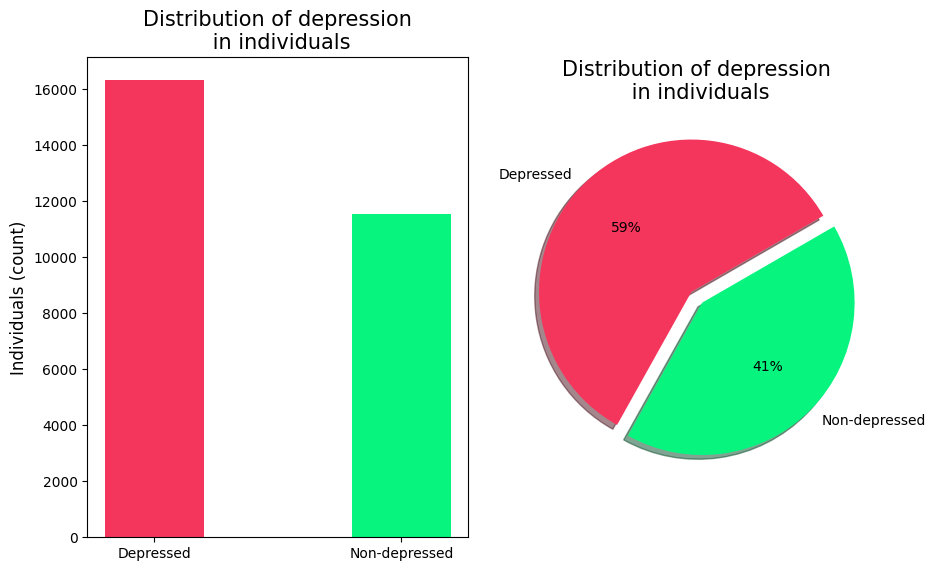

In [293]:
fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 6))
colors = ['#f5365c','#07f57e']
#-----------------------------------------------------------------------------------------------------------------------------
labels1 = ['Depressed','Non-depressed']
axes[0].bar(labels1, df['Depression'].value_counts(), width=0.4, color = colors)
axes[0].set_xticks(labels1,labels1,
                    rotation=0, ha='center')
axes[0].tick_params(axis='x', labelsize=10)
axes[0].set_title('Distribution of depression\n in individuals', size = 15)
axes[0].set_ylabel('Individuals (count)', size = 12)
#-----------------------------------------------------------------------------------------------------------------------------
explode = (0.05,0.05)
axes[1].pie(df['Depression'].value_counts(), labels=labels1,
                autopct='%1.0f%%', colors=colors, explode=explode, 
                shadow=True, startangle = 30)
axes[1].set_title('Distribution of depression\n in individuals',size = 15)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.1, hspace=0.4)
#-----------------------------------------------------------------------------------------------------------------------------
plt.show()

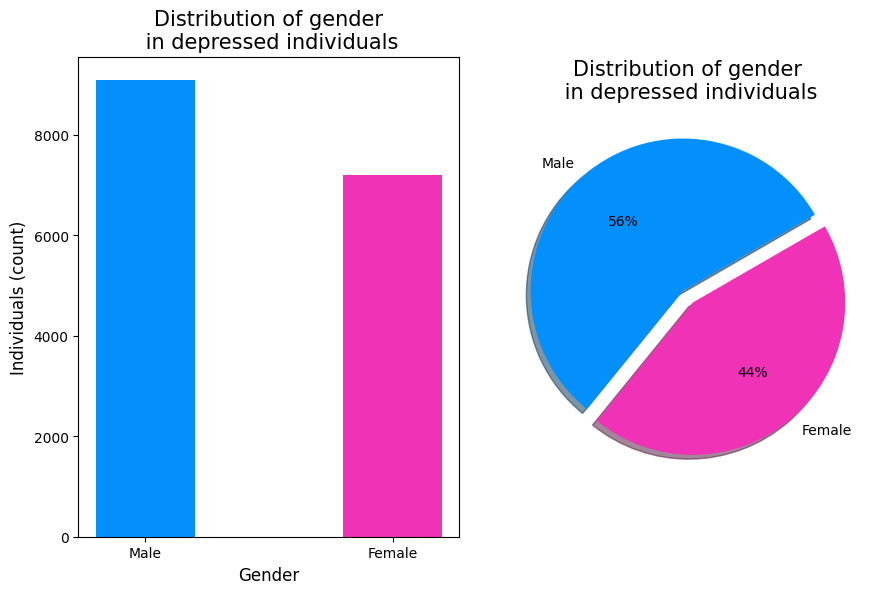

In [294]:
fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 6))
colors = ['#0390fc','#f032b7']
#-----------------------------------------------------------------------------------------------------------------------------
labels1 = df[df['Depression'] == True]['Gender'].value_counts().index
axes[0].bar(labels1, df[df['Depression'] == True]['Gender'].value_counts(), width=0.4, color = colors)
axes[0].set_xticks(labels1,labels1,
                    rotation=0, ha='center')
axes[0].tick_params(axis='x', labelsize=10)
axes[0].set_title('Distribution of gender\n in depressed individuals', size = 15)
axes[0].set_ylabel('Individuals (count)', size = 12)
axes[0].set_xlabel('Gender', size = 12)
#-----------------------------------------------------------------------------------------------------------------------------
explode = (0.05,0.05)
axes[1].pie(df[df['Depression'] == True]['Gender'].value_counts(), labels=labels1,
                autopct='%1.0f%%', colors=colors, explode=explode, 
                shadow=True, startangle = 30)
axes[1].set_title('Distribution of gender\n in depressed individuals',size = 15)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.1, hspace=0.4)
#-----------------------------------------------------------------------------------------------------------------------------
plt.show()

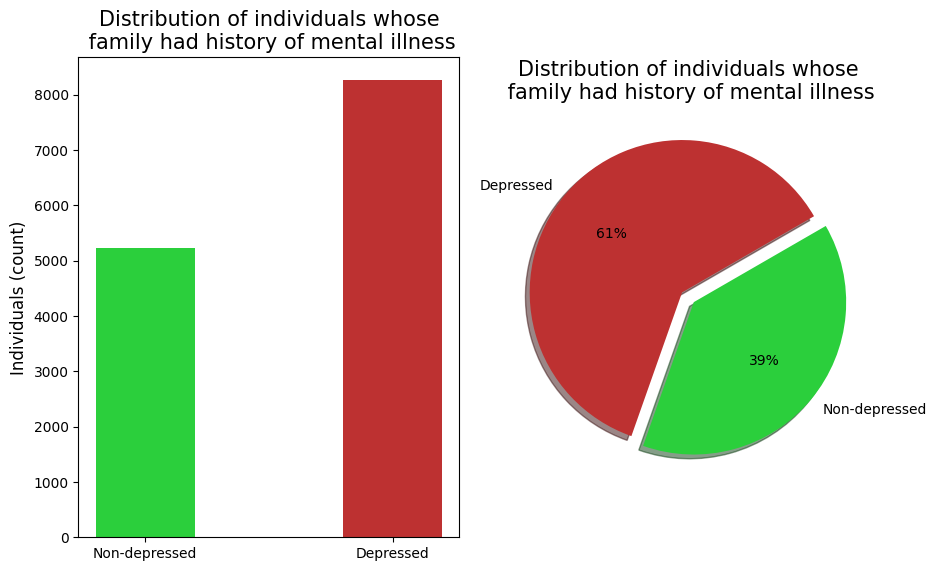

In [295]:
fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 6))
colors = ['#0390fc','#f032b7']
#-----------------------------------------------------------------------------------------------------------------------------
labels1 = df[df['Family History of Mental Illness'] == 'Yes']['Depression'].value_counts().index
axes[0].bar(labels1, df[df['Family History of Mental Illness'] == 'Yes']['Depression'].value_counts(),
             width=0.4, color = ['#bd3131','#2bcf3c'])
axes[0].set_xticks(labels1,['Depressed','Non-depressed'],
                    rotation=0, ha='center')
axes[0].tick_params(axis='x', labelsize=10)
axes[0].set_title('Distribution of individuals whose\n family had history of mental illness', size = 15)
axes[0].set_ylabel('Individuals (count)', size = 12)
#-----------------------------------------------------------------------------------------------------------------------------
explode = (0.05,0.05)
axes[1].pie(df[df['Family History of Mental Illness'] == 'Yes']['Depression'].value_counts(),
        labels=['Depressed','Non-depressed'], autopct='%1.0f%%', colors= ['#bd3131','#2bcf3c'],
        explode=explode, shadow=True, startangle = 30)
axes[1].set_title('Distribution of individuals whose\n family had history of mental illness', size = 15)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.1, hspace=0.4)
#-----------------------------------------------------------------------------------------------------------------------------
plt.show()

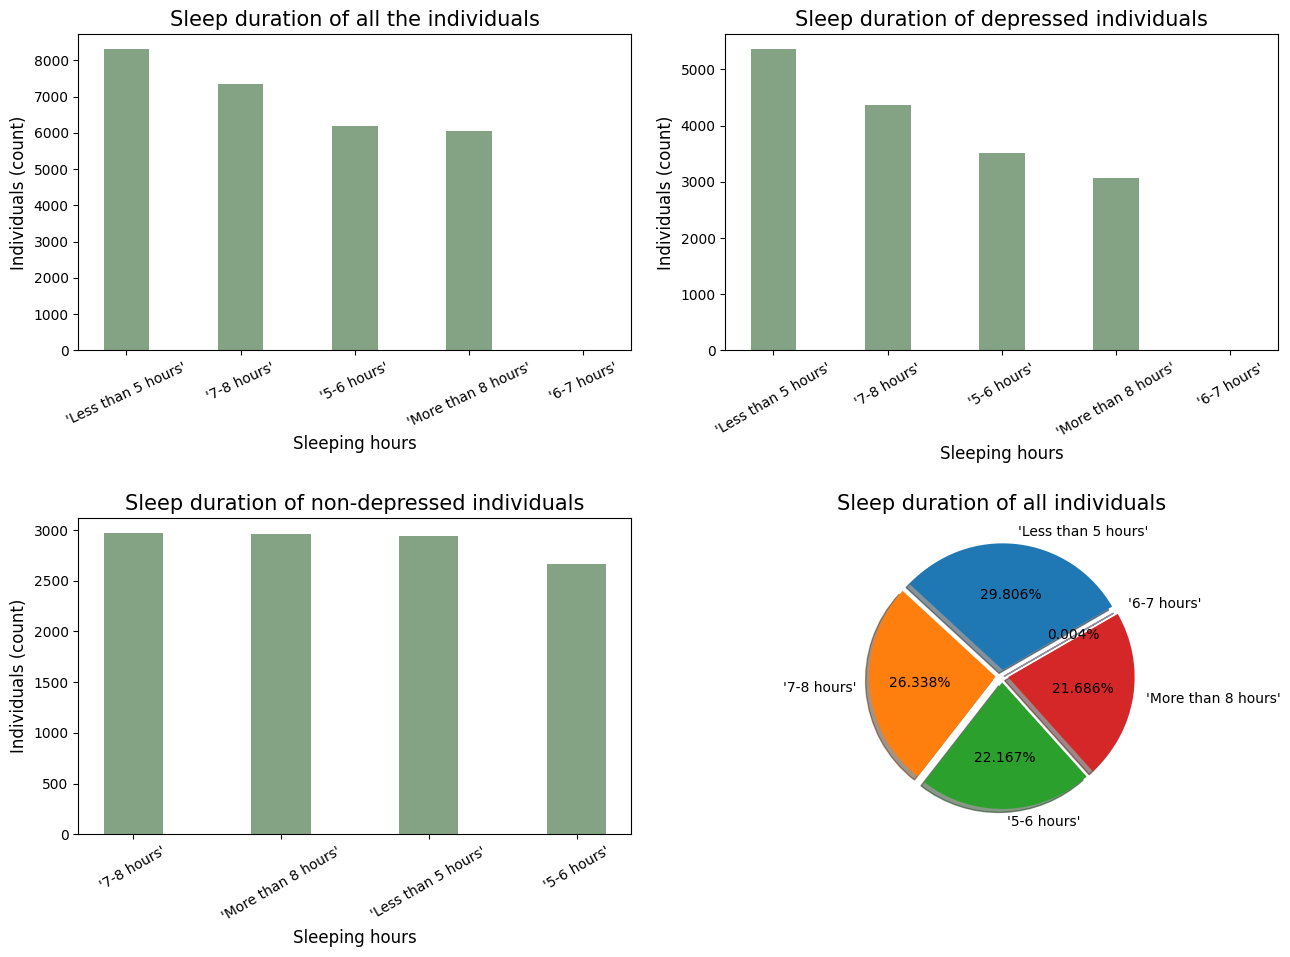

In [296]:
fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 10))
colors = (0.2,0.4,0.2,0.6)
#-----------------------------------------------------------------------------------------------------------------------------
labels1 = df['Sleep Duration'].value_counts().index
axes[0,0].bar(labels1, df['Sleep Duration'].value_counts(), width=0.4, color = colors)
axes[0,0].set_xticks(labels1, labels1, rotation=25, ha='center')
axes[0,0].tick_params(axis='x', labelsize=10)
axes[0,0].set_title('Sleep duration of all the individuals', size = 15)
axes[0,0].set_xlabel('Sleeping hours', size = 12)
axes[0,0].set_ylabel('Individuals (count)', size = 12)
#-----------------------------------------------------------------------------------------------------------------------------
labels2 = df[df['Depression'] == True]['Sleep Duration'].value_counts().index
axes[0,1].bar(labels2, df[df['Depression'] == True]['Sleep Duration'].value_counts(), width=0.4, color = colors)
axes[0,1].set_xticks(labels2, labels2, rotation=30, ha='center')
axes[0,1].tick_params(axis='x', labelsize=10)
axes[0,1].set_title('Sleep duration of depressed individuals', size = 15)
axes[0,1].set_xlabel('Sleeping hours', size = 12)
axes[0,1].set_ylabel('Individuals (count)', size = 12)
#-----------------------------------------------------------------------------------------------------------------------------
labels3 = df[df['Depression'] == False]['Sleep Duration'].value_counts().index
axes[1,0].bar(labels3, df[df['Depression'] == False]['Sleep Duration'].value_counts(), width=0.4, color = colors)
axes[1,0].set_xticks(labels3, labels3, rotation=30, ha='center')
axes[1,0].tick_params(axis='x', labelsize=10)
axes[1,0].set_title('Sleep duration of non-depressed individuals', size = 15)
axes[1,0].set_xlabel('Sleeping hours', size = 12)
axes[1,0].set_ylabel('Individuals (count)', size = 12)
#-----------------------------------------------------------------------------------------------------------------------------
explode = (0.05,0.05,0.05,0.05,0.05)
axes[1,1].pie(df['Sleep Duration'].value_counts(), autopct='%1.3f%%', shadow=True, startangle = 30, labels = labels1, 
              explode = explode )
axes[1,1].set_title('Sleep duration of all individuals',size = 15)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.17, hspace=0.53)
#-----------------------------------------------------------------------------------------------------------------------------
plt.show()

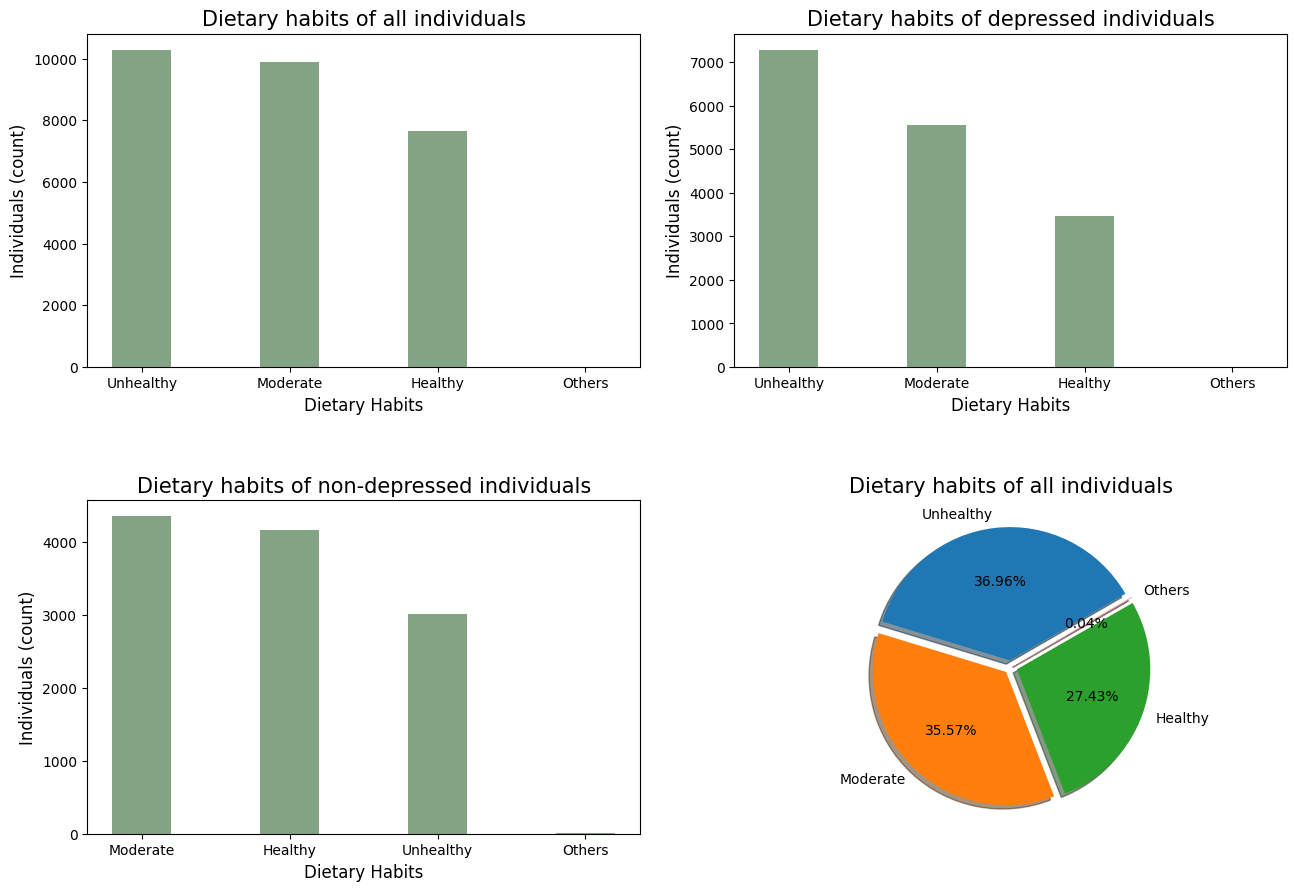

In [297]:
fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 10))
colors = (0.2,0.4,0.2,0.6)
#-----------------------------------------------------------------------------------------------------------------------------
labels1 = df['Dietary Habits'].value_counts().index
axes[0,0].bar(labels1, df['Dietary Habits'].value_counts(), width=0.4,color = colors)
axes[0,0].set_xticks(labels1, labels1, ha='center')
axes[0,0].tick_params(axis='x', labelsize=10)
axes[0,0].set_title('Dietary habits of all individuals', size = 15)
axes[0,0].set_ylabel('Individuals (count)', size = 12)
axes[0,0].set_xlabel('Dietary Habits', size = 12)
#-----------------------------------------------------------------------------------------------------------------------------
labels2 = df[df['Depression'] == True]['Dietary Habits'].value_counts().index
axes[0,1].bar(labels2, df[df['Depression'] == True]['Dietary Habits'].value_counts(), width=0.4, color = colors)
axes[0,1].set_xticks(labels2, labels2, ha='center')
axes[0,1].tick_params(axis='x', labelsize=10)
axes[0,1].set_title('Dietary habits of depressed individuals', size = 15)
axes[0,1].set_ylabel('Individuals (count)', size = 12)
axes[0,1].set_xlabel('Dietary Habits', size = 12)
#-----------------------------------------------------------------------------------------------------------------------------
labels3 = df[df['Depression'] == False]['Dietary Habits'].value_counts().index
axes[1,0].bar(labels3, df[df['Depression'] == False]['Dietary Habits'].value_counts(), width=0.4, color = colors)
axes[1,0].set_xticks(labels3, labels3, ha='center')
axes[1,0].tick_params(axis='x', labelsize=10)
axes[1,0].set_title('Dietary habits of non-depressed individuals', size = 15)
axes[1,0].set_ylabel('Individuals (count)', size = 12)
axes[1,0].set_xlabel('Dietary Habits', size = 12)
#-----------------------------------------------------------------------------------------------------------------------------
explode = (0.05,0.05,0.05,0.05)
axes[1,1].pie(df['Dietary Habits'].value_counts(), autopct='%1.2f%%', shadow=True, startangle = 30, labels = labels1,
              explode = explode)
axes[1,1].set_title('Dietary habits of all individuals', size = 15)
#-----------------------------------------------------------------------------------------------------------------------------
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.17, hspace=0.4)
plt.show()

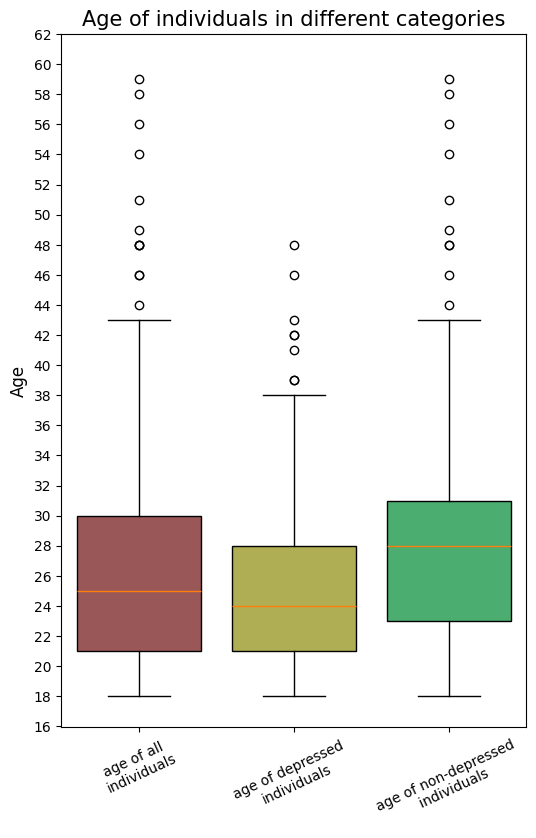

In [298]:
labels = ['age of all \nindividuals', 'age of depressed \nindividuals',
           'age of non-depressed\n individuals']
colors = ['#995757', '#b0ae54', '#4bad6f']

fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(6, 9))
axes.set_title('Age of individuals in different categories', size = 15)
axes.set_ylabel('Age', size = 12)

bplot = axes.boxplot([df['Age'],df[df['Depression'] == True]['Age'],df[df['Depression'] == False]['Age']], widths=0.80,
                   patch_artist=True,  # allows color
                   tick_labels=labels)
# fills with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    
axes.tick_params(axis='x', labelrotation=25)
axes.set_yticks(range(16,64,2))
axes.set_yticklabels(range(16,64,2))

plt.show()


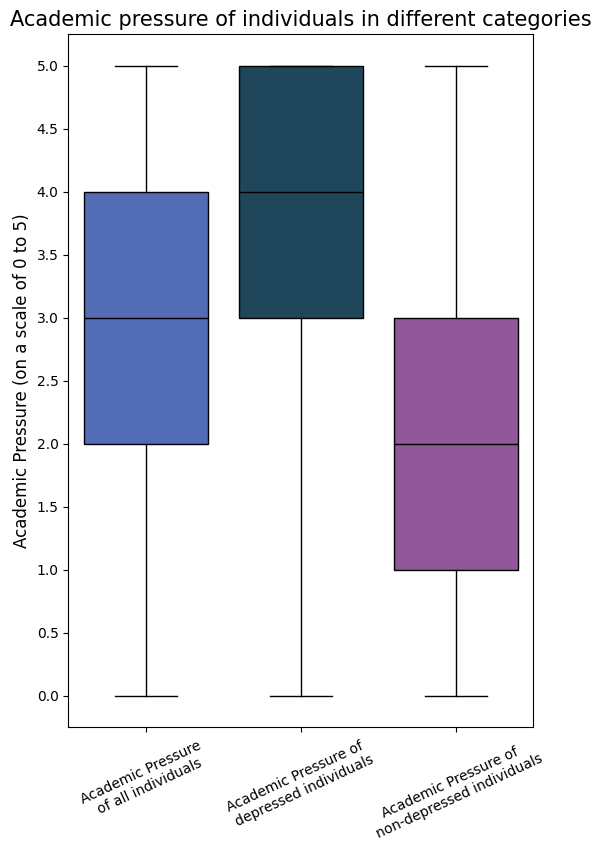

In [299]:
labels = ['Academic Pressure \nof all individuals', 'Academic Pressure of \ndepressed individuals',
           'Academic Pressure of \nnon-depressed individuals']
colors = ['#536cb8', '#20465c', '#905799']

fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(6, 9))
axes.set_title('Academic pressure of individuals in different categories', size = 15)
axes.set_ylabel('Academic Pressure (on a scale of 0 to 5)', size = 12)

bplot = axes.boxplot([df['Academic Pressure'],df[df['Depression'] == True]['Academic Pressure'],
                    df[df['Depression'] == False]['Academic Pressure']], widths=0.80,
                   patch_artist=True,
                   tick_labels=labels)

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

for median in bplot['medians']:
    median.set_color('black')

axes.tick_params(axis='x', labelrotation=25)
axes.set_yticks(np.arange(0,5.5,0.5))
axes.set_yticklabels(np.arange(0,5.5,0.5))

plt.show()


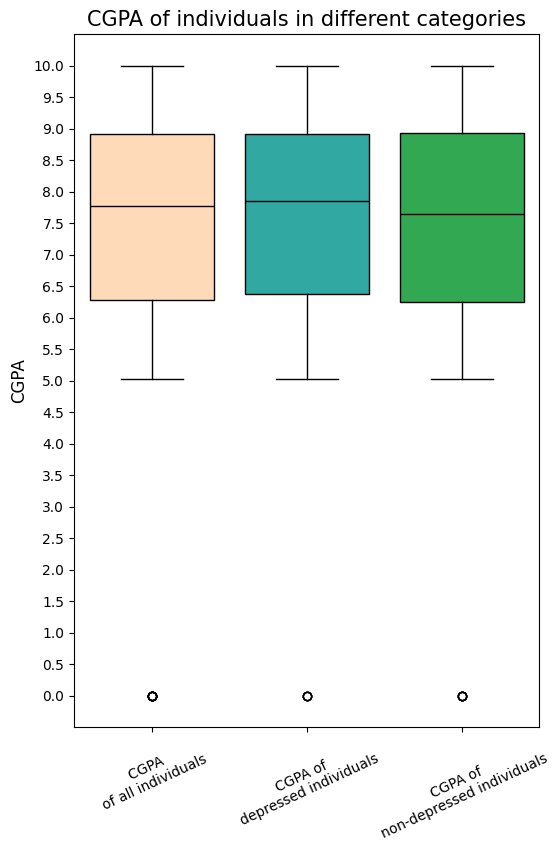

In [300]:
labels = ['CGPA \nof all individuals', 'CGPA of \ndepressed individuals',
           'CGPA of \nnon-depressed individuals']
colors = ['peachpuff', '#32a8a2', '#32a852']

fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(6, 9))
axes.set_title('CGPA of individuals in different categories', size = 15)
axes.set_ylabel('CGPA', size = 12)
bplot = axes.boxplot([df['CGPA'],df[df['Depression'] == True]['CGPA'],
                    df[df['Depression'] == False]['CGPA']], widths=0.80,
                   patch_artist=True,
                   tick_labels=labels) 

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

for median in bplot['medians']:
    median.set_color('black')
    
axes.tick_params(axis='x', labelrotation=25)
axes.set_yticks(np.arange(0,10.5,0.5))
axes.set_yticklabels(np.arange(0,10.5,0.5))

plt.show()

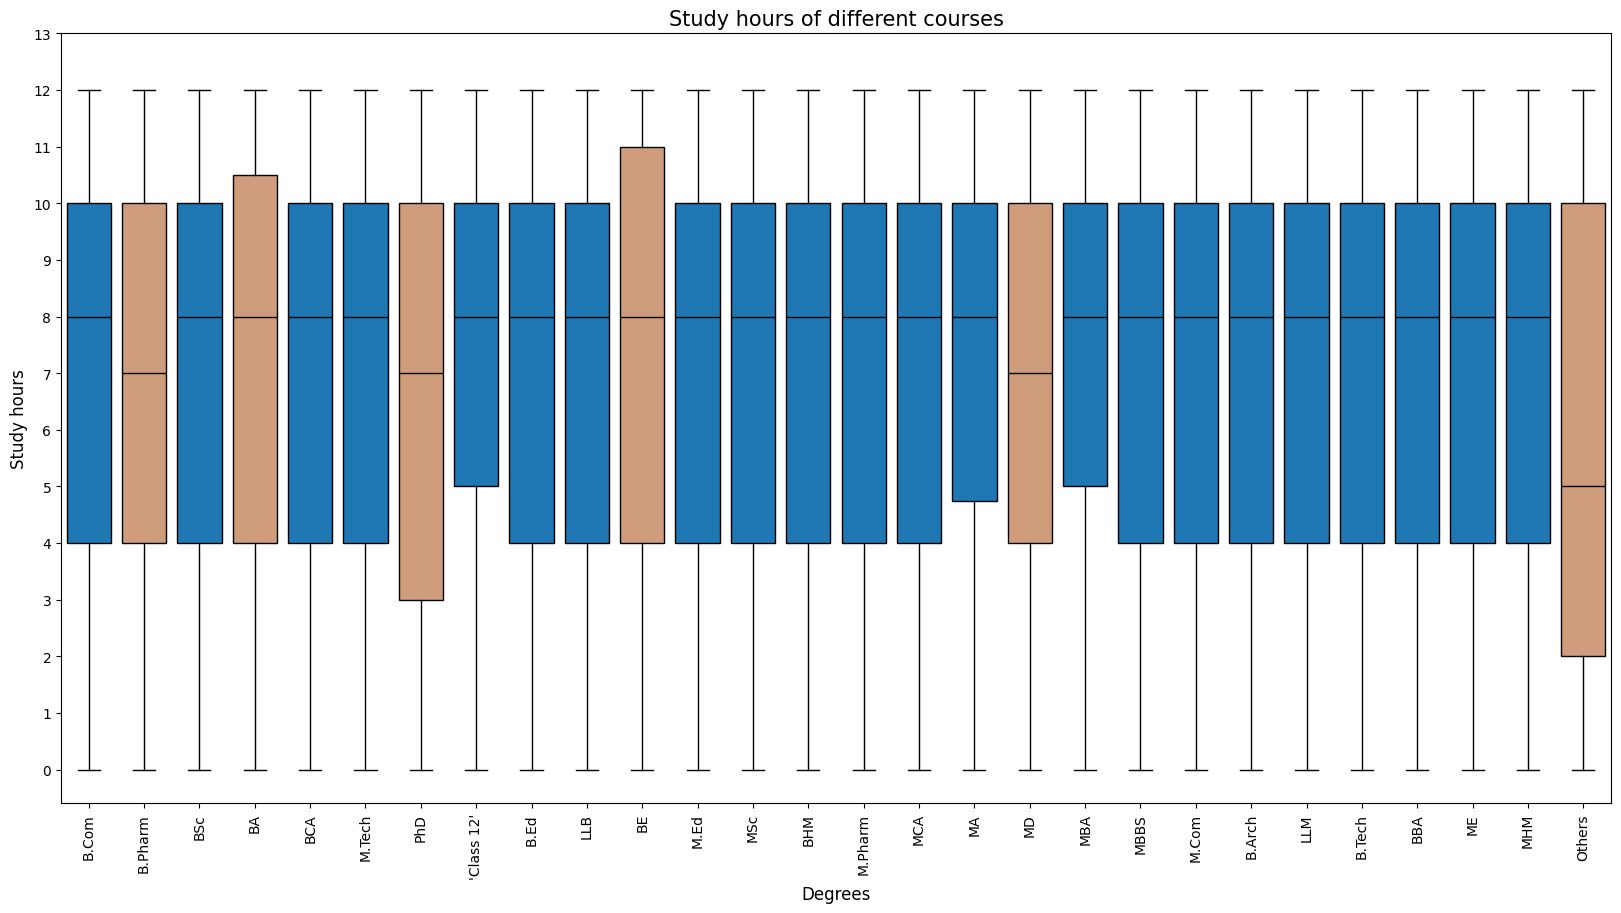

In [301]:
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(20, 10))
labels = df['Degree'].unique()
collection = []
for x in df['Degree'].unique() :
    collection.append(df[df['Degree']==x]['Work/Study Hours'])

bplot = axes.boxplot(collection, widths=0.80,
                   patch_artist=True,
                   tick_labels=labels) 

to_highlight = [1,3,6,10,17,27]
for x in to_highlight:
    bplot['boxes'][x].set_facecolor('#cf9d7c')

for median in bplot['medians']:
    median.set_color('black')

axes.tick_params(axis='x', labelrotation=90)
axes.set_title('Study hours of different courses', size = 15)
axes.set_xlabel('Degrees', size = 12)
axes.set_ylabel('Study hours', size = 12)
axes.set_yticks(np.arange(0,14,1))
axes.set_yticklabels(np.arange(0,14,1))

plt.show()

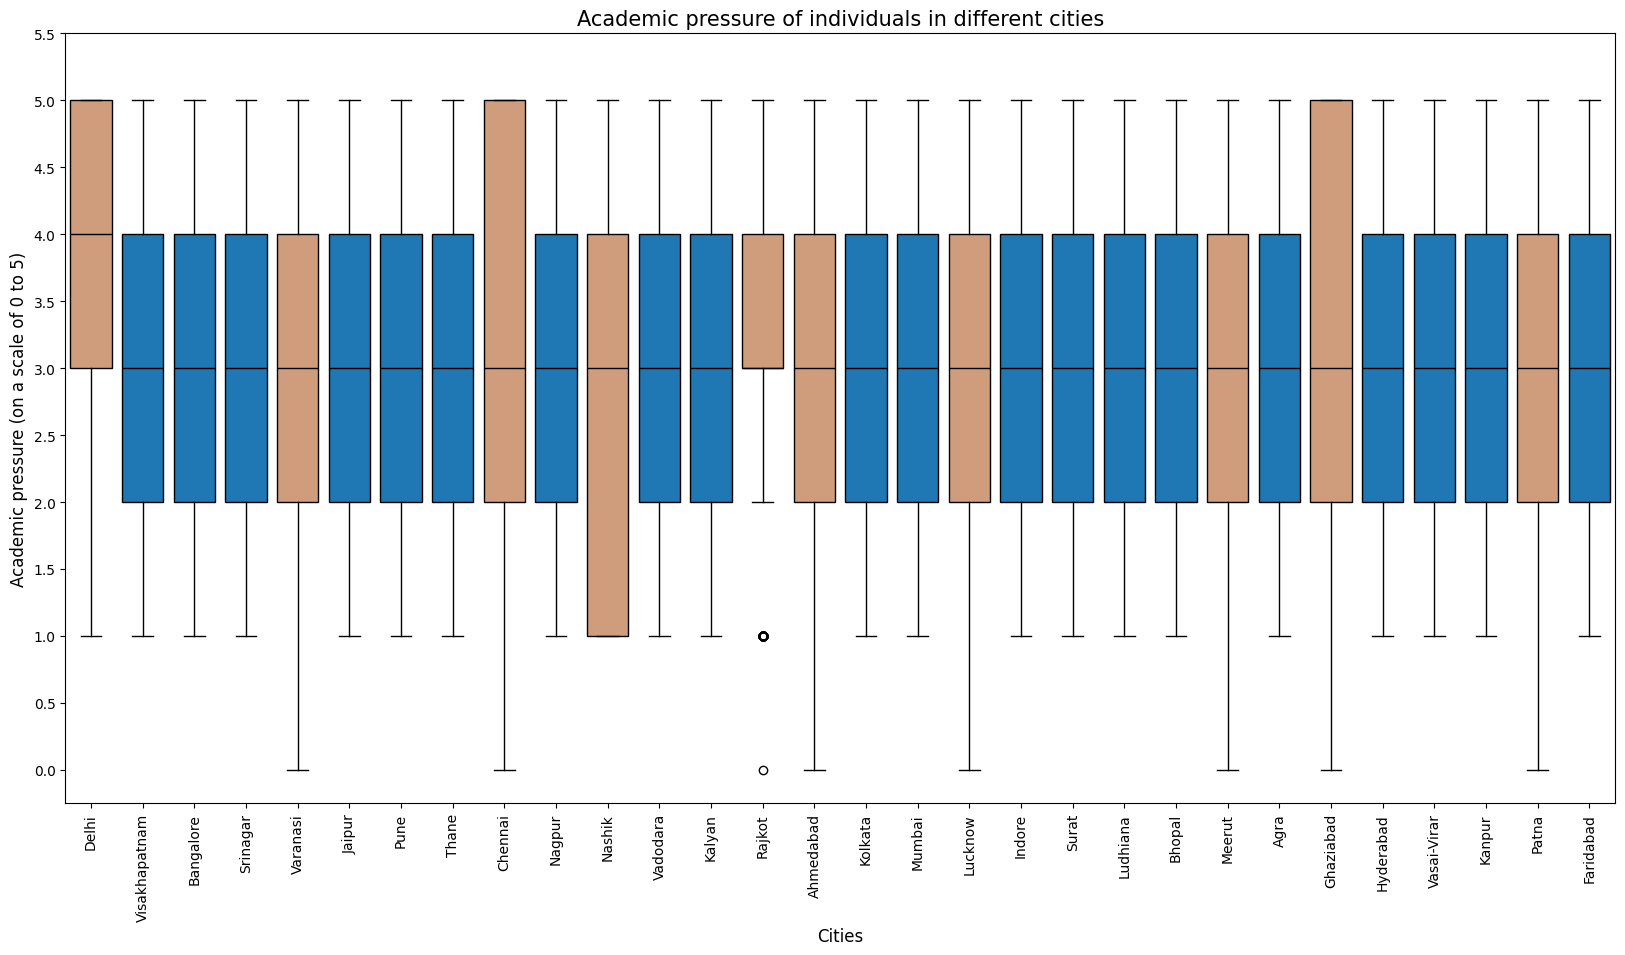

In [302]:
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(20, 10))
labels = df['City'].unique()
collection = []
for x in df['City'].unique() :
    collection.append(df[df['City']==x]['Academic Pressure'])

bplot = axes.boxplot(collection, widths=0.80,
                   patch_artist=True,
                   tick_labels=labels) 

to_highlight = [0,4,8,10,13,14,17,22,24,28]
for x in to_highlight:
    bplot['boxes'][x].set_facecolor('#cf9d7c')

for median in bplot['medians']:
    median.set_color('black')

axes.tick_params(axis='x', labelrotation=90)
axes.set_title('Academic pressure of individuals in different cities', size = 15)
axes.set_xlabel('Cities', size = 12)
axes.set_ylabel('Academic pressure (on a scale of 0 to 5)', size = 12)
axes.set_yticks(np.arange(0,6,0.5))
axes.set_yticklabels(np.arange(0,6,0.5))

plt.show()

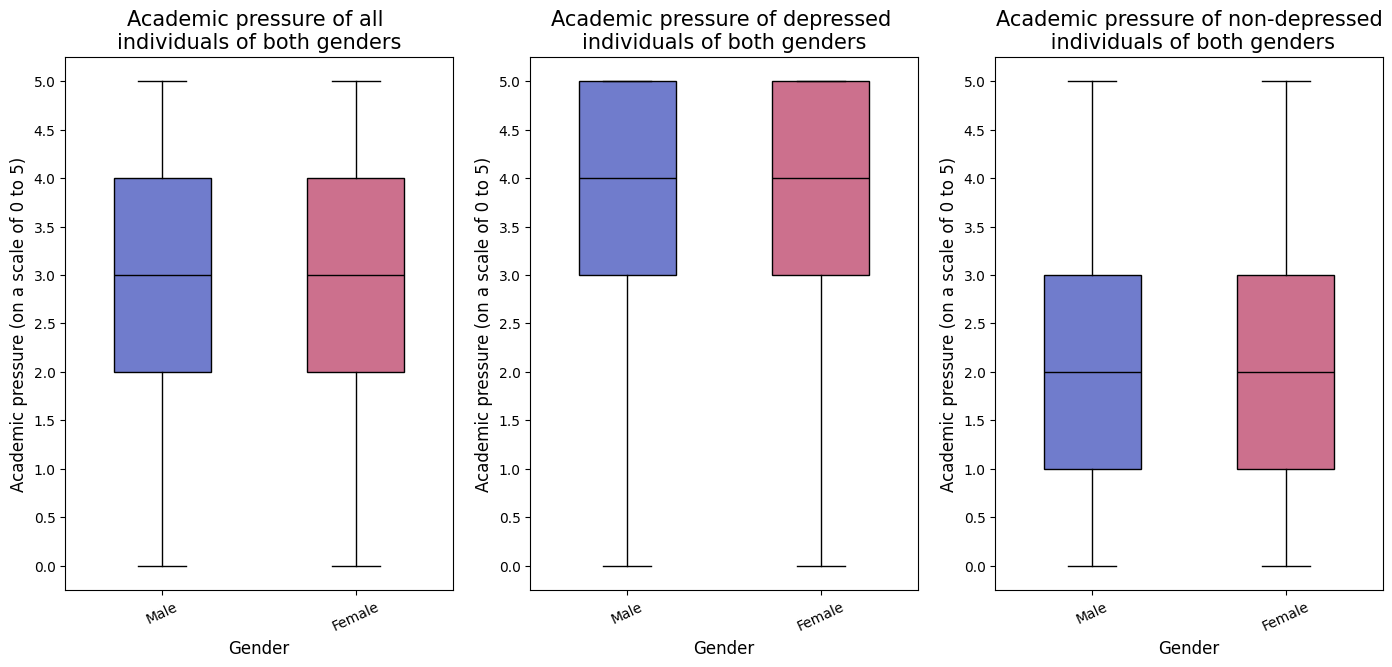

In [303]:
labels = ['Male','Female']
colors = ['#707ccc', '#cc708d']

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(17, 8.5))
#-----------------------------------------------------------------------------------------------------------------------------
axes[0].set_title('Academic pressure of all \nindividuals of both genders', size = 15)
axes[0].set_xlabel('Gender', size = 12)
axes[0].set_ylabel('Academic pressure (on a scale of 0 to 5)', size = 12)
bplot0 = axes[0].boxplot([df[df['Gender'] == 'Male']['Academic Pressure'],
                    df[df['Gender'] == 'Female']['Academic Pressure']], widths=0.5,
                   patch_artist=True,
                   tick_labels=labels) 

for patch, color in zip(bplot0['boxes'], colors):
    patch.set_facecolor(color)
    
for median in bplot0['medians']:
    median.set_color('black')

axes[0].tick_params(axis='x', labelrotation=25)
axes[0].set_yticks(np.arange(0,5.5,0.5))
axes[0].set_yticklabels(np.arange(0,5.5,0.5))
axes[0].set_aspect(0.5)
#-----------------------------------------------------------------------------------------------------------------------------
axes[1].set_title('Academic pressure of depressed \nindividuals of both genders', size = 15)
axes[1].set_xlabel('Gender', size = 12)
axes[1].set_ylabel('Academic pressure (on a scale of 0 to 5)', size = 12)
bplot1 = axes[1].boxplot([df[df['Depression']==True][df['Gender'] == 'Male']['Academic Pressure'],
                        df[df['Depression']==True][df['Gender'] == 'Female']['Academic Pressure']], widths=0.5,
                   patch_artist=True,
                   tick_labels=labels) 

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

for median in bplot1['medians']:
    median.set_color('black')

axes[1].tick_params(axis='x', labelrotation=25)
axes[1].set_yticks(np.arange(0,5.5,0.5))
axes[1].set_yticklabels(np.arange(0,5.5,0.5))
axes[1].set_aspect(0.5)
#-----------------------------------------------------------------------------------------------------------------------------
axes[2].set_title('Academic pressure of non-depressed\n individuals of both genders', size = 15)
axes[2].set_xlabel('Gender', size = 12)
axes[2].set_ylabel('Academic pressure (on a scale of 0 to 5)', size = 12)
bplot2 = axes[2].boxplot([df[df['Depression']==False][df['Gender'] == 'Male']['Academic Pressure'],
                        df[df['Depression']==False][df['Gender'] == 'Female']['Academic Pressure']], widths=0.5,
                   patch_artist=True,
                   tick_labels=labels) 

for patch, color in zip(bplot2['boxes'], colors):
    patch.set_facecolor(color)

for median in bplot2['medians']:
    median.set_color('black')

axes[2].tick_params(axis='x', labelrotation=25)
axes[2].set_yticks(np.arange(0,5.5,0.5))
axes[2].set_yticklabels(np.arange(0,5.5,0.5))
axes[2].set_aspect(0.5)
#-----------------------------------------------------------------------------------------------------------------------------
plt.show()

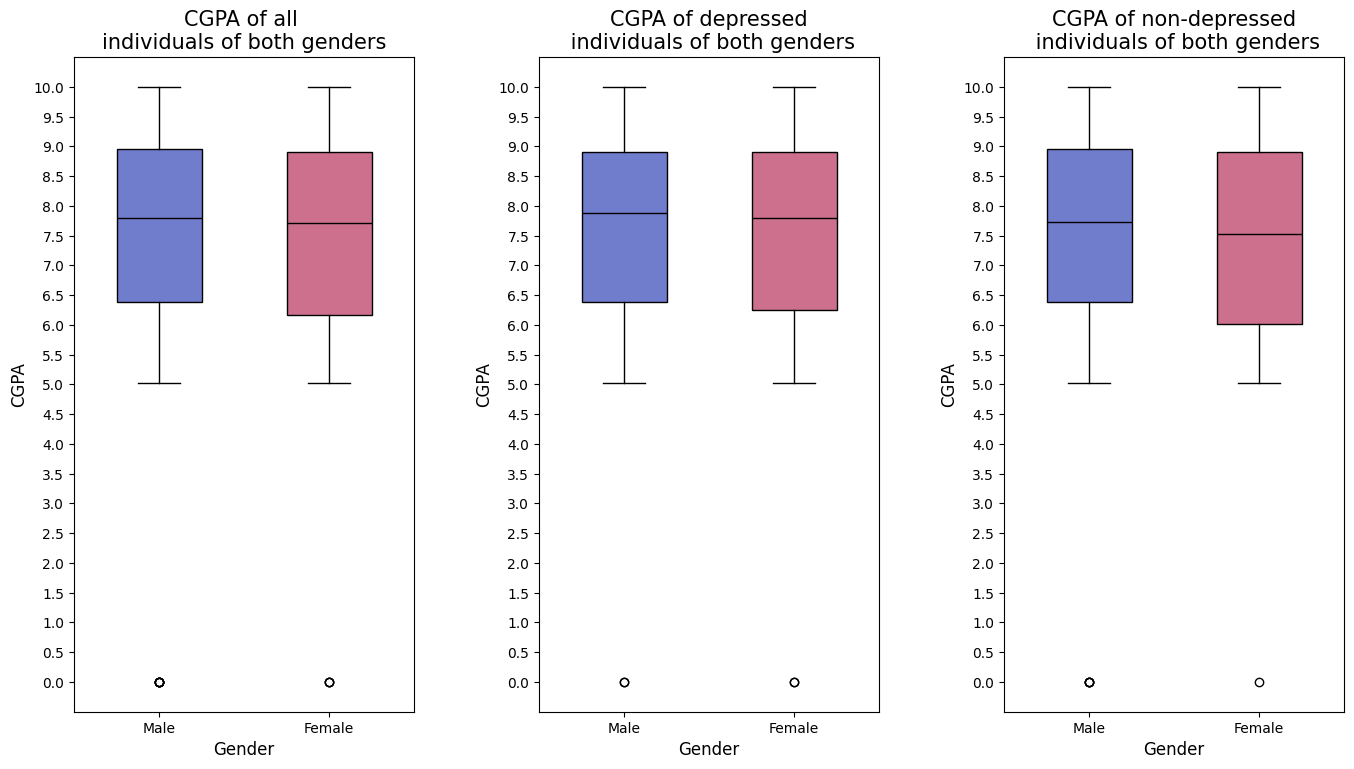

In [304]:
labels = ['Male','Female']
colors = ['#707ccc', '#cc708d']

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(17, 8.5))
#-----------------------------------------------------------------------------------------------------------------------------
axes[0].set_title('CGPA of all \nindividuals of both genders', size = 15)
axes[0].set_xlabel('Gender', size = 12)
axes[0].set_ylabel('CGPA', size = 12)
bplot0 = axes[0].boxplot([df[df['Gender'] == 'Male']['CGPA'],
                    df[df['Gender'] == 'Female']['CGPA']], widths=0.5,
                   patch_artist=True,
                   tick_labels=labels) 

for patch, color in zip(bplot0['boxes'], colors):
    patch.set_facecolor(color)

for median in bplot0['medians']:
    median.set_color('black')

axes[0].set_yticks(np.arange(0,10.5,0.5))
axes[0].set_yticklabels(np.arange(0,10.5,0.5))
axes[0].set_aspect(0.35)
#-----------------------------------------------------------------------------------------------------------------------------
axes[1].set_title('CGPA of depressed\n individuals of both genders', size = 15)
axes[1].set_xlabel('Gender', size = 12)
axes[1].set_ylabel('CGPA', size = 12)
bplot1 = axes[1].boxplot([df[df['Depression']==True][df['Gender'] == 'Male']['CGPA'],
                        df[df['Depression']==True][df['Gender'] == 'Female']['CGPA']], widths=0.5,
                   patch_artist=True,
                   tick_labels=labels) 

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    
for median in bplot1['medians']:
    median.set_color('black')

axes[1].set_yticks(np.arange(0,10.5,0.5))
axes[1].set_yticklabels(np.arange(0,10.5,0.5))
axes[1].set_aspect(0.35)
#-----------------------------------------------------------------------------------------------------------------------------
axes[2].set_title('CGPA of non-depressed\n individuals of both genders', size = 15)
axes[2].set_xlabel('Gender', size = 12)
axes[2].set_ylabel('CGPA', size = 12)
bplot2 = axes[2].boxplot([df[df['Depression']==False][df['Gender'] == 'Male']['CGPA'],
                        df[df['Depression']==False][df['Gender'] == 'Female']['CGPA']], widths=0.5,
                   patch_artist=True,
                   tick_labels=labels) 

for patch, color in zip(bplot2['boxes'], colors):
    patch.set_facecolor(color)

for median in bplot2['medians']:
    median.set_color('black')
    
axes[2].set_yticks(np.arange(0,10.5,0.5))
axes[2].set_yticklabels(np.arange(0,10.5,0.5))
axes[2].set_aspect(0.35)
#-----------------------------------------------------------------------------------------------------------------------------
plt.show()

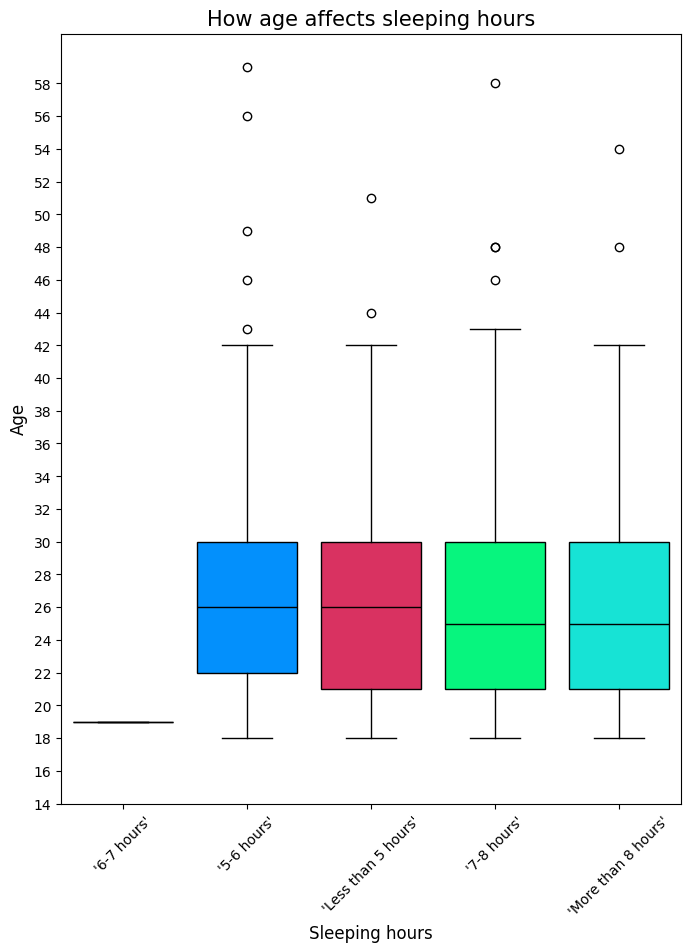

In [305]:
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(8,10))
labels = df['Sleep Duration'].unique()
collection = []
colors = ['#48db5e','#0390fc','#d93261','#07f57e','#17e3d5']
for x in df['Sleep Duration'].unique() :
    collection.append(df[df['Sleep Duration']==x]['Age'])

bplot = axes.boxplot(collection, widths=0.80,
                   patch_artist=True,
                   tick_labels=labels) 

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

for median in bplot['medians']:
    median.set_color('black')

axes.tick_params(axis='x', labelrotation=45)
axes.set_title('How age affects sleeping hours', size = 15)
axes.set_xlabel('Sleeping hours', size = 12)
axes.set_ylabel('Age', size = 12)
axes.set_yticks(np.arange(14,60,2))
axes.set_yticklabels(np.arange(14,60,2))

plt.show()

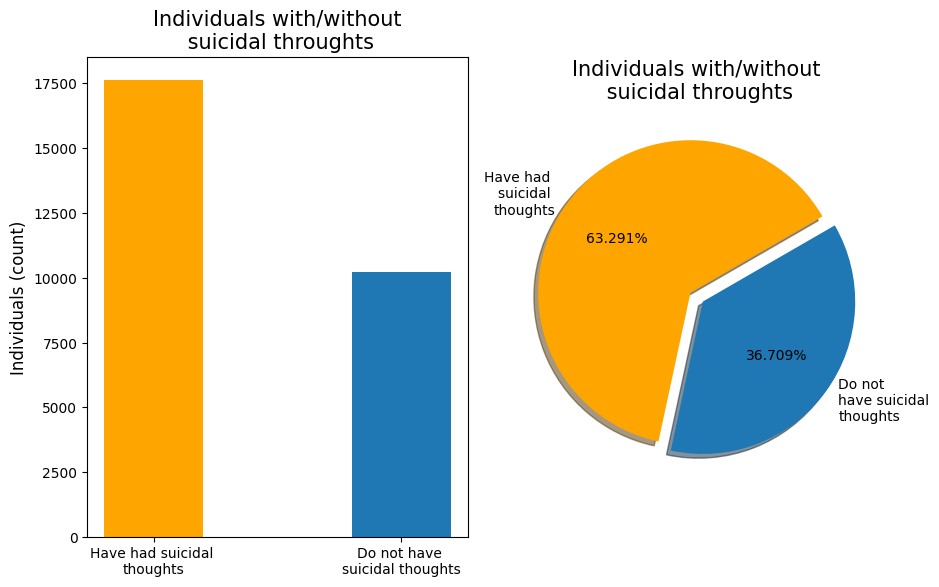

In [306]:
fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 6))
#-----------------------------------------------------------------------------------------------------------------------------
labels1 = df['Have you ever had suicidal thoughts ?'].value_counts().index
colors = ['orange','#1f77b4']
# (0.2,0.4,0.2,0.6) 
axes[0].bar(labels1, df['Have you ever had suicidal thoughts ?'].value_counts(), width=0.4, color = colors)
axes[0].set_xticks(labels1,['Have had suicidal \nthoughts','Do not have \nsuicidal thoughts'],
                    rotation=0, ha='center')
axes[0].tick_params(axis='x', labelsize=10)
axes[0].set_title('Individuals with/without\n suicidal throughts', size = 15)
axes[0].set_ylabel('Individuals (count)',size = 12)
#-----------------------------------------------------------------------------------------------------------------------------
explode = (0.05,0.05)
axes[1].pie(df['Have you ever had suicidal thoughts ?'].value_counts(), autopct='%1.3f%%', shadow=True, startangle = 30,
             labels = ['Have had \nsuicidal \nthoughts','Do not \nhave suicidal\nthoughts'], explode = explode, colors=colors)
axes[1].set_title('Individuals with/without\n suicidal throughts', size = 15)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.1, hspace=0.4)
#-----------------------------------------------------------------------------------------------------------------------------
plt.show()

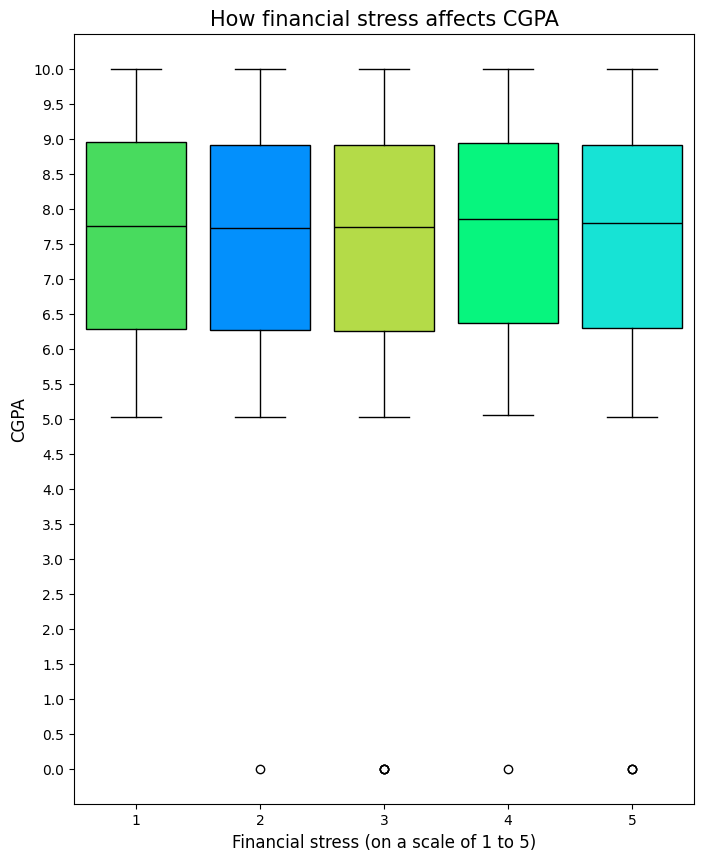

In [307]:
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(8,10))
labels = sorted(df['Financial Stress'].unique())
collection = []
colors = ['#48db5e','#0390fc','#b4db48','#07f57e','#17e3d5']

for x in sorted(df['Financial Stress'].unique()) :
    collection.append(df[df['Financial Stress']==x]['CGPA'])

bplot = axes.boxplot(collection, widths=0.80,
                   patch_artist=True,
                   tick_labels=labels) 

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

for median in bplot['medians']:
    median.set_color('black')

axes.set_title('How financial stress affects CGPA', size = 15)
axes.tick_params(axis='x', labelrotation=0)
axes.set_ylabel('CGPA', size = 12)
axes.set_xlabel('Financial stress (on a scale of 1 to 5)', size = 12)
axes.set_yticks(np.arange(0,10.5,0.5))
axes.set_yticklabels(np.arange(0,10.5,0.5))

plt.show()

In [308]:
#for summary -- refer thesis/documentation